In [201]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import optuna.integration.lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [202]:
train_path = 'train.csv'
test_path = 'test.csv'

In [203]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [204]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [205]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [206]:
print (train_data.columns.values)

['battery_power' 'blue' 'clock_speed' 'dual_sim' 'fc' 'four_g'
 'int_memory' 'm_dep' 'mobile_wt' 'n_cores' 'pc' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time' 'three_g' 'touch_screen' 'wifi']


In [229]:
x_imp=train.loc[:,['battery_power','px_height','px_width','ram']].values
y = train["price_range"].values


x_train,x_test,y_train,y_test = train_test_split(x_imp,y,test_size=0.3,random_state=1234)

In [219]:
train_data = train.drop("price_range",axis=1)
y = train["price_range"].values
x = train_data.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

<AxesSubplot:>

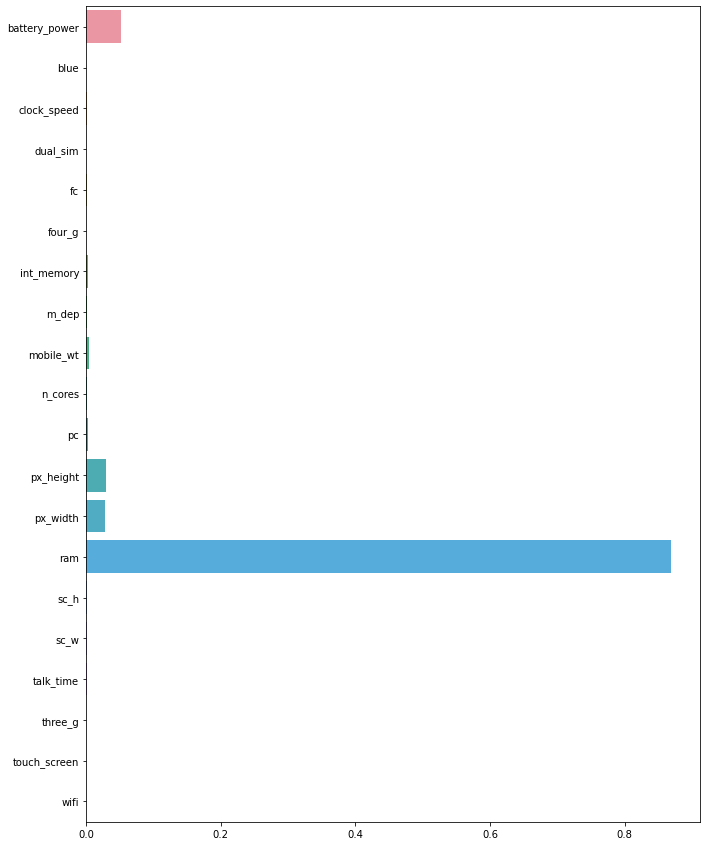

In [230]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=80, max_features='auto')
rf.fit(x, y)

f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_, y=train_data.columns.values, orient='h')

In [293]:
clf = RandomForestClassifier(n_estimators=100,random_state=1234)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=1234)

In [294]:
pred = clf.predict(x_test)

In [295]:
print('score=',clf.score(x_test,y_test))

score= 0.9166666666666666


In [225]:
#特徴量の標準化
x_train = (x_train - x_train.mean()) / x_train.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [300]:
from sklearn.model_selection import GridSearchCV
rfr_grid = GridSearchCV(clf,cv=5,param_grid = {'n_estimators':[10,25,50,100,],
              'min_samples_split':[0.5,2,4,10],
              'min_samples_leaf':[1,2,4,10],
              'max_features':[2,4,8],
              'bootstrap':[True, False]
              })
 
rfr_grid = rfr_grid.fit(x_train, y_train)
rfr_grid_best = rfr_grid.best_estimator_


/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/hibiki/miniforge3/envs/my-env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/hibiki/miniforge3/envs/my

best params =  {'bootstrap': True, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [240]:
print("best params = ",rfr_grid.best_params_)

best params =  {'bootstrap': True, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [290]:
clf_best = RFR(n_estimators=100,
                max_features = 2,
                min_samples_split = 2,
                min_samples_leaf = 1,
                bootstrap = True,
                random_state = 1234)
clf_best.fit(x_train,y_train)
 

RandomForestRegressor(max_features=2, random_state=1234)

In [291]:
y_pred_cfr_best = clf_best.predict(x_test)

In [292]:
print('score=',clf_best.score(x_test,y_test))

score= 0.9485334786642765


In [274]:
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=44,
                       min_samples_split=9)

In [138]:
import lightgbm as lgb

model = lgb.LGBMClassifier(bootstrap=True)

In [139]:
model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: bootstrap


LGBMClassifier(bootstrap=True)

In [140]:
pred = model.predict(x_test)

In [141]:
print('score=',model.score(x_test,y_test))

score= 0.9183333333333333


In [270]:
# 目的関数の定義（最小値問題として定式化する。）
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split", 8, 16)
    max_leaf_nodes = int(trial.suggest_discrete_uniform("max_leaf_nodes", 4, 64, 4))
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    RFC = RandomForestClassifier(min_samples_split = min_samples_split, 
                                max_leaf_nodes = max_leaf_nodes,
                                criterion = criterion)
    RFC.fit(x_train, y_train)
    return 1.0 - accuracy_score(y_test, RFC.predict(x_test))

In [51]:
import optuna
study = optuna.create_study()
study.optimize(objective, n_trials = 100)

[I 2021-06-05 23:52:40,715] A new study created in memory with name: no-name-4d1d9cff-1454-45e2-8f3c-9ac2cd82ea88
[I 2021-06-05 23:52:40,871] Trial 0 finished with value: 0.1466666666666666 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 28.0, 'criterion': 'gini'}. Best is trial 0 with value: 0.1466666666666666.
[I 2021-06-05 23:52:41,028] Trial 1 finished with value: 0.1333333333333333 and parameters: {'min_samples_split': 10, 'max_leaf_nodes': 56.0, 'criterion': 'entropy'}. Best is trial 1 with value: 0.1333333333333333.
[I 2021-06-05 23:52:41,116] Trial 2 finished with value: 0.21833333333333338 and parameters: {'min_samples_split': 10, 'max_leaf_nodes': 4.0, 'criterion': 'gini'}. Best is trial 1 with value: 0.1333333333333333.
[I 2021-06-05 23:52:41,245] Trial 3 finished with value: 0.15833333333333333 and parameters: {'min_samples_split': 11, 'max_leaf_nodes': 28.0, 'criterion': 'gini'}. Best is trial 1 with value: 0.1333333333333333.
[I 2021-06-05 23:52:41,360] Trial 

[I 2021-06-05 23:52:46,660] Trial 37 finished with value: 0.1316666666666667 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 56.0, 'criterion': 'gini'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:46,821] Trial 38 finished with value: 0.14833333333333332 and parameters: {'min_samples_split': 14, 'max_leaf_nodes': 40.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:46,953] Trial 39 finished with value: 0.14500000000000002 and parameters: {'min_samples_split': 11, 'max_leaf_nodes': 32.0, 'criterion': 'gini'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:47,109] Trial 40 finished with value: 0.135 and parameters: {'min_samples_split': 10, 'max_leaf_nodes': 48.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:47,274] Trial 41 finished with value: 0.1333333333333333 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 60.0, 'crite

[I 2021-06-05 23:52:52,520] Trial 73 finished with value: 0.1466666666666666 and parameters: {'min_samples_split': 9, 'max_leaf_nodes': 36.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:52,694] Trial 74 finished with value: 0.1316666666666667 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 60.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:52,860] Trial 75 finished with value: 0.14166666666666672 and parameters: {'min_samples_split': 12, 'max_leaf_nodes': 64.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:53,033] Trial 76 finished with value: 0.1466666666666666 and parameters: {'min_samples_split': 13, 'max_leaf_nodes': 56.0, 'criterion': 'entropy'}. Best is trial 18 with value: 0.1233333333333333.
[I 2021-06-05 23:52:53,201] Trial 77 finished with value: 0.1433333333333333 and parameters: {'min_samples_split': 11, 'max_leaf_nod

In [54]:
study.best_params    # 求めたハイパーパラメータ


{'min_samples_split': 9, 'max_leaf_nodes': 44.0, 'criterion': 'entropy'}

In [278]:
RFC = RandomForestClassifier(min_samples_split = 9, 
                                max_leaf_nodes = 44,
                                criterion = 'entropy')

In [275]:
print('score=',RFC.score(x_test,y_test))

score= 0.8983333333333333


In [172]:
x_imp=train.loc[:,['battery_power','px_height','px_width','ram']]
y = train["price_range"]

In [53]:
1.0 - study.best_value

0.8783333333333333

In [181]:
org_sort = np.argsort(-rf.feature_importances_)
 
#f, ax = plt.subplots(figsize=(11, 19))
#sns.barplot(rf.feature_importances_[org_sort], y=X_train.columns.values[org_sort], orient='h')
 
X_train = train.iloc[:,org_sort[:4]]


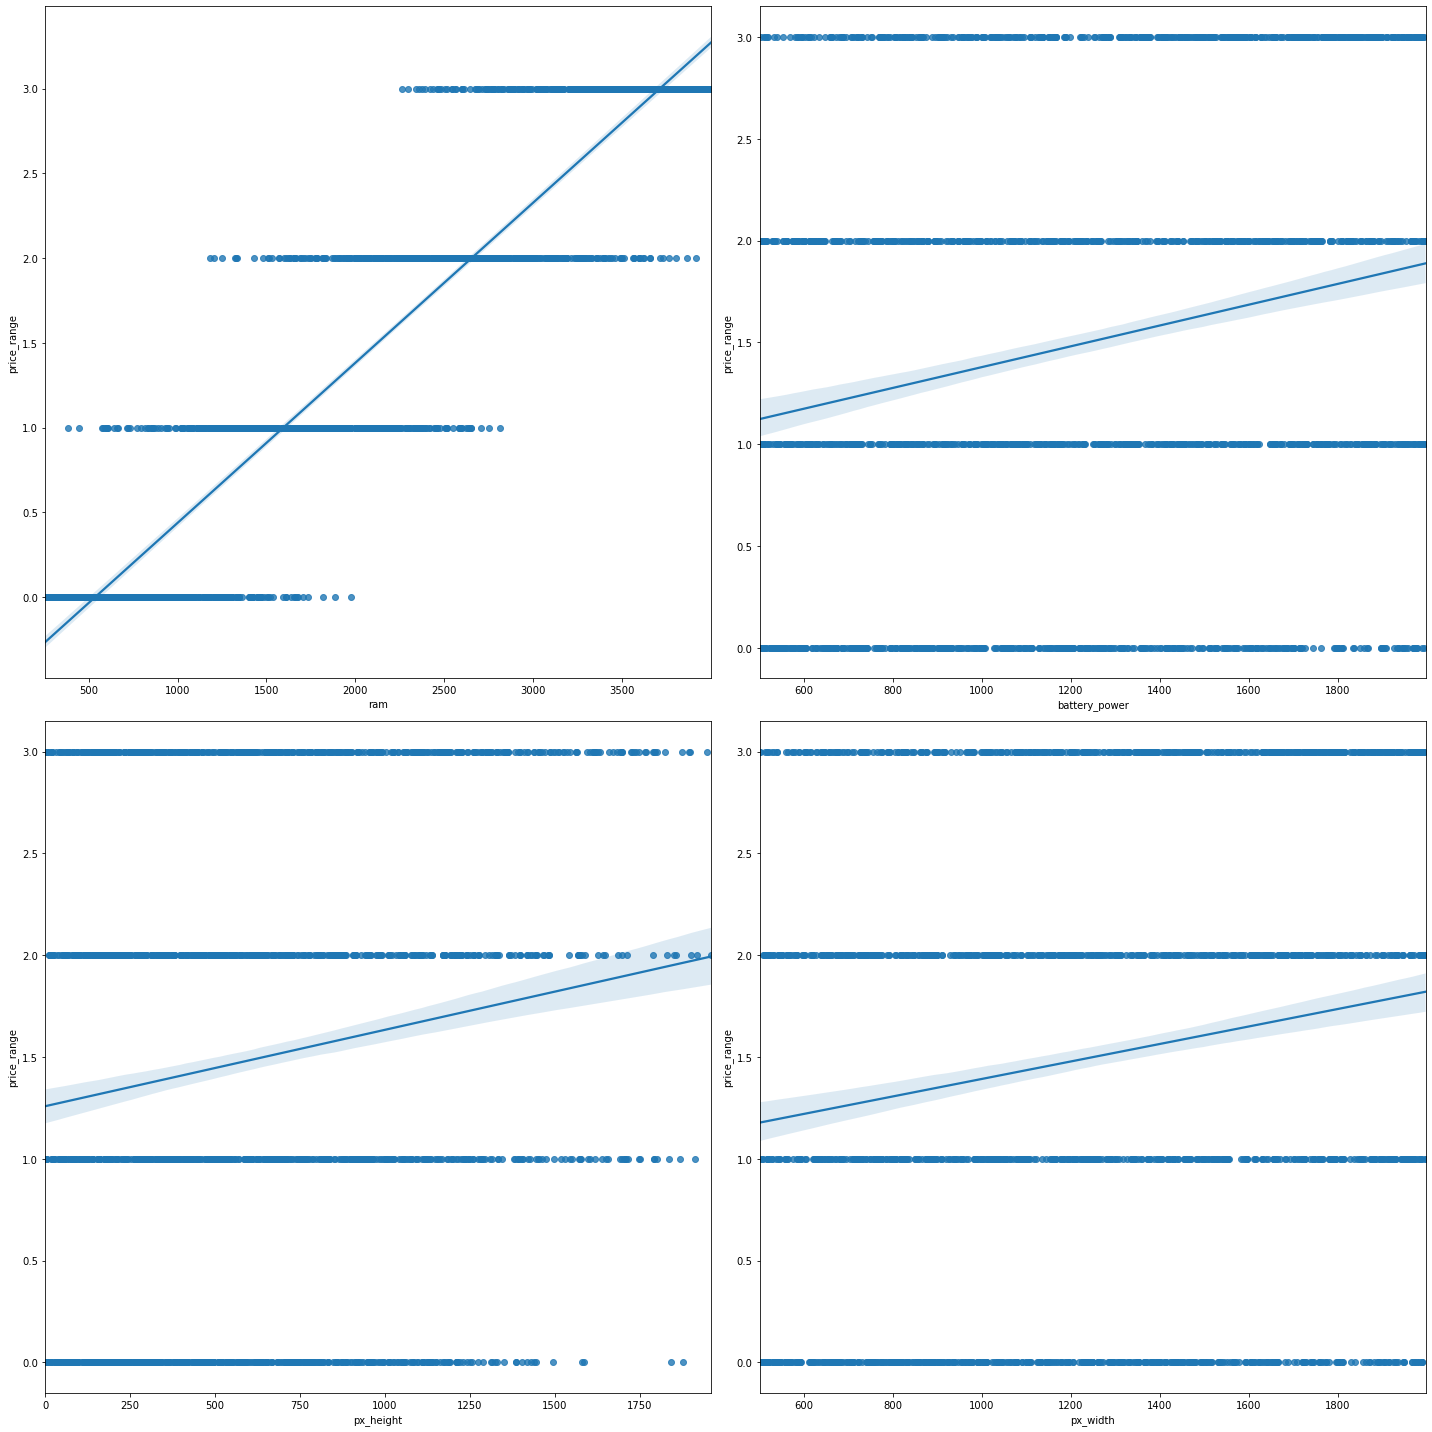

In [192]:

#目的変数と説明変数の2変量の関係を描画
fig = plt.figure(figsize=(20,20))

for i in range(4):
    
    ax = fig.add_subplot(2,2,i+1)
    
    sns.regplot(x=X_train.iloc[:,i], y=y)

plt.tight_layout()
plt.show()